# Overview

This a notebook that inspects the results of a WarpX simulation.

In [10]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib notebook
yt.add_field()

## Read data in the simulation frame

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [14]:
diag_name = 'plt' # E.g., diagnostics.diags_names = diag
iteration = 0
plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
field = 'Ez'
species = 'electron'
ds = yt.load( plotfile ) # Load the plotfile
# ds.field_list # Print all available quantities

### Plot data with yt

/home/revanathan/.local/lib/python3.9/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'Ez' is ambiguous and corresponds to any one of the following field types:
 {'mesh'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("mesh", "Ez")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/revanathan/.local/lib/python3.9/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'Ez' is ambiguous and corresponds to any one of the following field types:
 {'mesh'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("boxlib", "Ez")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)



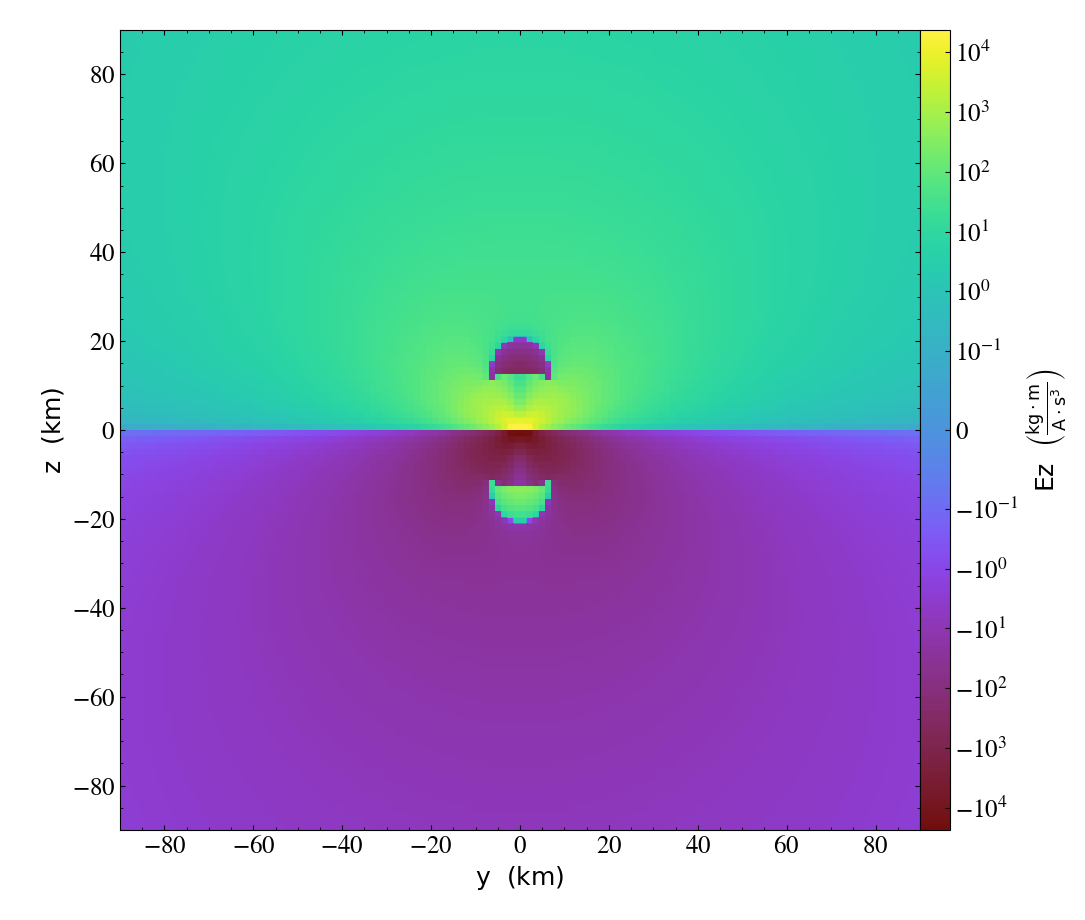

In [18]:
sl = yt.SlicePlot(ds, 0, field, aspect=1) # Create a sliceplot object
sl.set_zlim(field,-100,100)
#sl.annotate_particles(width=(10.e-6, 'm'), p_size=2, ptype=species, col='black')
#sl.annotate_grids() # Show grids
sl.show() # Show the plot

### Store quantities in numpy arrays, and plot with matplotlib

In [ ]:
# Get field quantities
all_data_level_0 = ds.covering_grid(level=0,left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Bx = all_data_level_0['boxlib', field].v.squeeze()
Dx = ds.domain_width/ds.domain_dimensions
extent = [ds.domain_left_edge[ds.dimensionality-1], ds.domain_right_edge[ds.dimensionality-1],
          ds.domain_left_edge[0], ds.domain_right_edge[0] ]

# Get particle quantities
ad = ds.all_data()
x = ad[species, 'particle_position_x'].v
z = ad[species, 'particle_position_z'].v

# Plot image
plt.figure()
plt.imshow(Bx[:,Bx.shape[1]//2,:], extent=extent, aspect='auto')
plt.scatter(z,x,s=.1,c='k')

## Read data back-transformed to the lab frame when the simulation runs in the boosted frame (example: 2D run)

In [ ]:
# read_raw_data.py is located in warpx/Tools.
import os, glob
import read_raw_data

In [ ]:
iteration = 1

snapshot = './lab_frame_data/' + 'snapshot' + str(iteration).zfill(5)
header   = './lab_frame_data/Header'
allrd, info = read_raw_data.read_lab_snapshot(snapshot, header) # Read field data
F = allrd[field]
print( "Available info: ", list(info.keys()) )
print("Available fields: ", info['field_names'])
nx = info['nx']
nz = info['nz']
x = info['x']
z = info['z']
xbo  = read_raw_data.get_particle_field(snapshot, species, 'x') # Read particle data
ybo  = read_raw_data.get_particle_field(snapshot, species, 'y')
zbo  = read_raw_data.get_particle_field(snapshot, species, 'z')
uzbo = read_raw_data.get_particle_field(snapshot, species, 'uz')

plt.figure(figsize=(6, 3))
extent = np.array([info['zmin'], info['zmax'], info['xmin'], info['xmax']])
plt.imshow(F[:,F.shape[1]//2,:], aspect='auto', extent=extent, cmap='seismic')
plt.colorbar()
plt.plot(zbo, xbo, 'g.', markersize=1.)


## Read back-transformed data with hdf5 format (example: 3D run)

In [ ]:
import h5py
import matplotlib.pyplot as plt
f = h5py.File('HDF5_lab_frame_data/snapshot00003', 'r')
print( list(f.keys()) )
# plt.figure()
plt.imshow(f['Ey'][:,,:])